In [1]:
# snippet from ~/Library/Jupyter/nbextensions/snippets/snippets.json
# basic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('/Users/nknezek/code/MgSi-Exsolution/')
from mg_si import plot as mplt
import dill

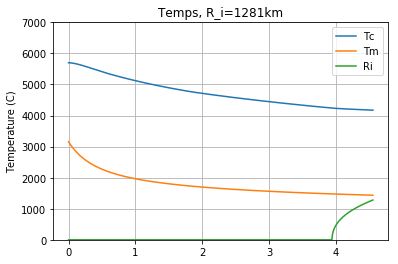

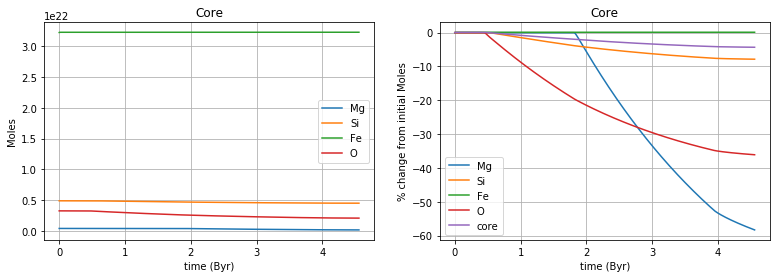

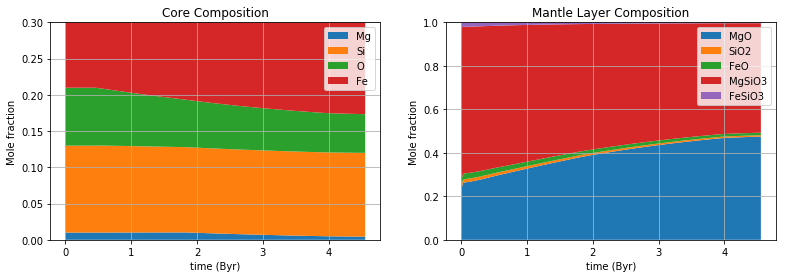

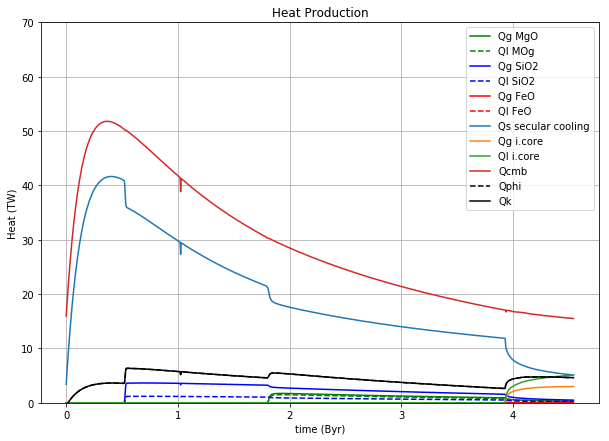

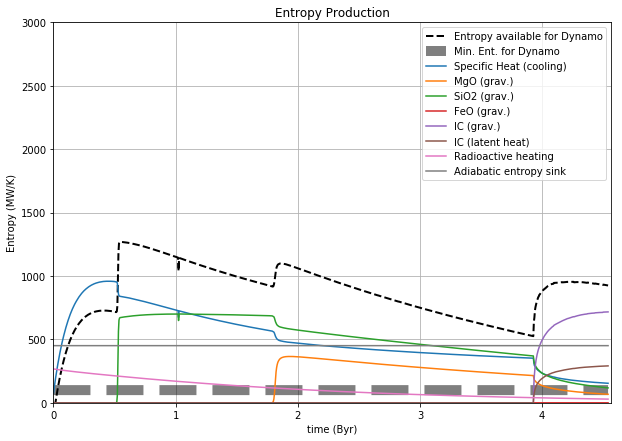

In [10]:
base = '/Users/nknezek/code/MgSi-Exsolution/comparison_runs/'
subfolder = 'Tc5700.0_XM0.010_XS0.120_XO0.080/'
datafile = 'data.m'


folders = ['base_comparison/','slow_mantle_overturn/','fast_mantle_overturn/','no_Mg_precip/','no_MgSi_precip/','no_Si_precip/']
for folder in folders:
    filepath = base+folder+subfolder
    with open(filepath+datafile, 'rb') as file:
        pl,times,solution = dill.load(file)
    mplt.temperature(pl, times, solution, filepath=filepath)
    mplt.coremoles(pl, times, solution, filepath=filepath)
    mplt.composition(pl, times, solution, filepath=filepath)
    try:
        t_N, all_parameters = dill.load(open(filepath+'new_parameters.m','rb'))
    except:
        t_N, all_parameters = pl.core_layer.compute_all_parameters(times, solution)
        dill.dump((t_N,all_parameters) ,open(filepath+'new_parameters.m','wb'))
    mplt.Q_all(pl, t_N, all_parameters, filepath=filepath)
    mplt.E_all(pl, t_N, all_parameters, filepath=filepath)

